<a href="https://colab.research.google.com/github/Indian-otaku/Miscellaneous_python_programs/blob/main/DataStructuresAndAlgorithmsWithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linked List

In [4]:
class LinkedListNode:
    def __init__(self, data, next=None):
        self.data = data
        self.next = next

    def __repr__(self):
        return f"|{self.data}|"

class LinkedList:
    def __init__(self):
        self.first = None

    def __repr__(self):
        node = self.first
        out = str(node)
        node = node.next
        while node:
            out += "-->" + str(node)
            node = node.next
        return out

    def __len__(self):
        counter = 0
        node = self.first
        while node:
            counter += 1
            node = node.next
        return counter

    def insert_at_beginning(self, data):
        if not self.first:
            self.first = LinkedListNode(data, None)
            return
        self.first = LinkedListNode(data, self.first)

    def insert_at_end(self, data):
        if not self.first:
            self.first = LinkedListNode(data, None)
            return
        node = self.first
        while node.next:
            node = node.next
        node.next = LinkedListNode(data, None)

    def insert_at_index(self, index, data):
        length = len(self)
        if index > length or index < 0:
            raise Exception("Invalid index.")
        if index == 0:
            self.insert_at_beginning(data)
            return
        node = self.first
        counter = 0
        while counter < index-1:
            node = node.next
            counter += 1
        node.next = LinkedListNode(data, node.next)

    def insert_after_value(self, value, data):
        node = self.first
        counter = 0
        while node:
            if node.data == value:
                node.next = LinkedListNode(data, node.next)
                return
            node = node.next
            counter += 1
        raise Exception("Value not found in Linked List.")

    def create_from_list(self, data_list=[]):
        if self.first:
            raise Exception("Linked List is not empty.")
        if not data_list:
            raise Exception("Input List is empty.")
        self.first = LinkedListNode(data_list[0], None)
        node = self.first
        for element in data_list[1:]:
            node.next = LinkedListNode(element, None)
            node = node.next

    def delete_at_beginning(self):
        if not self.first:
            raise Exception("Linked List is empty.")
        node = self.first
        self.first = self.first.next
        return node

    def delete_at_end(self):
        if not self.first:
            raise Exception("Linked List is empty.")
        if not self.first.next:
            return self.delete_at_beginning()
        node = self.first
        while node.next.next:
            node = node.next
        output = node.next
        node.next = None
        return output

    def delete_at_index(self, index):
        ll_len = len(self)
        if index >= ll_len or index < 0:
            raise Exception("Invalid index.")
        if index == 0:
            return self.delete_at_beginning()
        node = self.first
        counter = 0
        while counter < index-1:
            counter += 1
            node = node.next
        output = node.next
        node.next = node.next.next
        return output

    def delete_with_value(self, value):
        if self.first.data == value:
            return self.delete_at_beginning()
        counter = 1
        node = self.first
        while node.next:
            if node.next.data == value:
                output = node.next
                node.next = node.next.next
                return output
            counter += 1
            node = node.next
        raise Exception("Value not found in Linked List.")

    def get_index(self, value):
        node = self.first
        if not node:
            raise Exception("Linked List is empty.")
        counter = 0
        while node:
            if node.data == value:
                return counter
            counter += 1
            node = node.next
        return -1

    def get_value(self, index):
        node = self.first
        if not node:
            raise Exception("Linked List is empty.")
        if index >= len(self) or index < 0:
            raise Exception("Invalid index.")
        counter = 0
        while counter < index:
            counter += 1
            node = node.next
        return node.data




In [5]:
ll = LinkedList()
ll.create_from_list([23, 45, 122, 12, 42, 434])
print(ll)

|23|-->|45|-->|122|-->|12|-->|42|-->|434|


# Doubly Linked List

In [6]:
class DoublyLinkedListNode:
    def __init__(self, data, prev=None, next=None):
        self.data = data
        self.next = next
        self.prev = prev

    def __repr__(self):
        return f"|{self.data}|"

class DoublyLinkedList:
    def __init__(self):
        self.first = None
        self.last = None

    def __repr__(self):
        node = self.first
        out = str(node)
        node = node.next
        while node:
            out += "<->" + str(node)
            node = node.next
        return out

    def __len__(self):
        counter = 0
        node = self.first
        while node:
            counter += 1
            node = node.next
        return counter

    def insert_at_beginning(self, data):
        if not self.first or not self.last:
            self.first = DoublyLinkedListNode(data, None, None)
            self.last = self.first
            return
        new_node = DoublyLinkedListNode(data, None, self.first)
        self.first.prev = new_node
        self.first = new_node

    def insert_at_end(self, data):
        if not self.first or not self.last:
            self.insert_at_beginning(data)
            return
        new_node = DoublyLinkedListNode(data, self.last, None)
        self.last.next = new_node
        self.last = new_node

    def insert_at_index(self, index, data):
        length = len(self)
        if index > length or index < 0:
            raise Exception("Invalid index.")
        if index == 0:
            self.insert_at_beginning(data)
            return
        if index == length:
            self.insert_at_end(data)
            return
        node = self.first
        counter = 0
        while counter < index-1:
            node = node.next
            counter += 1
        new_node = DoublyLinkedListNode(data, node, node.next)
        node.next.prev = new_node
        node.next = new_node

    def insert_after_value(self, value, data):
        if self.first.data == value:
            self.insert_at_beginning(data)
            return
        if self.last.data == value:
            self.insert_at_end(data)
            return
        node = self.first.next
        while node:
            if node.data == value:
                new_node = DoublyLinkedListNode(data, node, node.next)
                node.next.prev = new_node
                node.next = new_node
                return
            node = node.next
        raise Exception("Value not found in Linked List.")

    def create_from_list(self, data_list=[]):
        if self.first or self.last:
            raise Exception("Linked List is not empty.")
        if not data_list:
            raise Exception("Input List is empty.")
        self.first = DoublyLinkedListNode(data_list[0], None, None)
        node = self.first
        for element in data_list[1:]:
            node.next = DoublyLinkedListNode(element, node, None)
            node = node.next
        self.last = node

    def delete_at_beginning(self):
        if not self.first:
            raise Exception("Linked List is empty.")
        node = self.first
        if self.first == self.last:
            self.first = None
            self.last = None
            return node
        self.first.next.prev = None
        self.first = self.first.next
        node.next = None
        return node

    def delete_at_end(self):
        if not self.first:
            raise Exception("Linked List is empty.")
        node = self.last
        if self.first == self.last:
            self.first = None
            self.last = None
            return node
        self.last.prev.next = None
        self.last = node.prev
        node.prev = None
        return node

    def delete_at_index(self, index):
        ll_len = len(self)
        if index >= ll_len or index < 0:
            raise Exception("Invalid index.")
        if index == 0:
            return self.delete_at_beginning()
        if index == ll_len-1:
            return self.delete_at_end()
        node = self.first
        counter = 0
        while counter < index-1:
            counter += 1
            node = node.next
        output = node.next
        output.prev.next = output.next
        output.next.prev = output.prev
        output.prev = None
        output.next = None
        return output

    def delete_with_value(self, value):
        if self.first.data == value:
            return self.delete_at_beginning()
        node = self.first
        while node.next:
            if node.next.data == value:
                output = node.next
                if output != self.last:
                    output.prev.next = output.next
                    output.next.prev = output.prev
                else:
                    self.last = node
                    node.next = None
                output.prev = None
                output.next = None
                return output
            node = node.next
        raise Exception("Value not found in Linked List.")

    def get_index(self, value):
        node = self.first
        if not node:
            raise Exception("Linked List is empty.")
        counter = 0
        while node:
            if node.data == value:
                return counter
            counter += 1
            node = node.next
        return -1

    def get_value(self, index):
        node = self.first
        if not node:
            raise Exception("Linked List is empty.")
        if index >= len(self) or index < 0:
            raise Exception("Invalid index.")
        counter = 0
        while counter < index:
            counter += 1
            node = node.next
        return node.data




In [7]:
dll = DoublyLinkedList()
dll.create_from_list([1, 3, 4, 2, 5, 7])
print(dll, "\t", dll.first, dll.first.prev, dll.last, dll.last.next)
dll.insert_at_end(44)
print(dll, "\t", dll.first, dll.first.prev, dll.last, dll.last.next)
dll.delete_with_value(5)
print(dll, "\t", dll.first, dll.first.prev, dll.last, dll.last.next)

dll.get_value(2)

|1|<->|3|<->|4|<->|2|<->|5|<->|7| 	 |1| None |7| None
|1|<->|3|<->|4|<->|2|<->|5|<->|7|<->|44| 	 |1| None |44| None
|1|<->|3|<->|4|<->|2|<->|7|<->|44| 	 |1| None |44| None


4

# Hash Table

In [8]:
class HashTable:
    def __init__(self, max_size=10):
        self.max_size = max_size
        self.memory = [[] for i in range(self.max_size)]

    def _hash_function(self, key):
        out = 0
        for c in str(key):
            out += ord(c)
        return out % self.max_size

    def __getitem__(self, key):
        key_hash = self._hash_function(key)
        for i, (key_i, val_i) in enumerate(self.memory[key_hash]):
            if key_i == key:
                return val_i

    def __setitem__(self, key, value):
        key_hash = self._hash_function(key)
        for i, (key_i, val_i) in enumerate(self.memory[key_hash]):
            if key_i == key:
                self.memory[key_hash][i] = (key, value)
                return
        self.memory[key_hash].append((key, value))

    def __delitem__(self, key):
        key_hash = self._hash_function(key)
        for i, (key_i, val_i) in enumerate(self.memory[key_hash]):
            if key_i == key:
                del self.memory[key_hash][i]
                return
        raise Exception("Given key doesn't exist!")

In [9]:
ht = HashTable(10)
ht["3"] = 5
ht["14"] = 15
ht["76"] =35
print(ht.memory)

[[], [('3', 5), ('14', 15)], [], [], [], [], [], [], [], [('76', 35)]]


In [10]:
ht["14"]

15

In [11]:
del ht["3"]

In [12]:
ht.memory

[[], [('14', 15)], [], [], [], [], [], [], [], [('76', 35)]]

In [13]:
for i in range(25):
    ht[str(i)] = i

In [14]:
ht.memory

[[('2', 2), ('13', 13), ('22', 22)],
 [('14', 14), ('3', 3), ('23', 23)],
 [('4', 4), ('15', 15), ('24', 24)],
 [('5', 5), ('16', 16)],
 [('6', 6), ('17', 17)],
 [('7', 7), ('18', 18)],
 [('8', 8), ('19', 19)],
 [('9', 9), ('10', 10)],
 [('0', 0), ('11', 11), ('20', 20)],
 [('76', 35), ('1', 1), ('12', 12), ('21', 21)]]

In [15]:
ht["14"]

14

# Stack

In [16]:
from collections import deque

class Stack:
    def __init__(self):
        self.s = deque()

    def __repr__(self):
        return f"Stack{list(self.s)}"

    def push(self, value):
        self.s.append(value)

    def pop(self):
        return self.s.pop()

    def peek(self):
        return self.s[-1]

    def is_empty(self):
        return len(self.s)==0

In [17]:
stack = Stack()
stack.push(5)
stack.push(44)
stack.push(4)
print(stack)
stack.pop()
stack.pop()
stack.pop()
stack.is_empty()

Stack[5, 44, 4]


True

In [18]:
def is_paranthesis_balanced(equation):
    s = Stack()
    for c in equation:
        if c == "(":
            s.push(c)
        elif c == ")":
            if s.is_empty():
                return False
            s.pop()
    return s.is_empty()

print(is_paranthesis_balanced("9+(645+(33/44)))"))
print(is_paranthesis_balanced("9+(645+(33/44))"))

False
True


# Queue

In [19]:
from collections import deque

class Queue:
    def __init__(self):
        self.q = deque()

    def __repr__(self):
        return f"Queue{list(self.q)}"

    def enqueue(self, value):
        self.q.appendleft(value)

    def dequeue(self):
        return self.q.pop()

    def peek(self):
        return self.q[-1]

    def is_empty(self):
        return len(self.q)==0

In [20]:
queue = Queue()
queue.enqueue(4)
queue.enqueue(44)
queue.enqueue(9)
print(queue)
queue.dequeue()
print(queue)
queue.dequeue()
print(queue)

Queue[9, 44, 4]
Queue[9, 44]
Queue[9]


# Tree

In [21]:
from collections import deque

class TreeNode:
    def __init__(self, data):
        self.data = data
        self.parent = None
        self.childrens = []

    def __repr__(self):
        return f"TreeNode[{self.data}]"

    def add_child(self, child):
        assert isinstance(child, TreeNode), "Child should be of TreeNode type."
        child.parent = self
        self.childrens.append(child)

    def _print_childrens(self, root, prefix=""):
        for child in root.childrens:
            print(prefix, "|---", child, sep="")
            self._print_childrens(child, prefix+"    ")

    def print_tree(self):
        root = self
        print(root)
        self._print_childrens(root)

    def tree_search(self, data, dfs=True):
        """
        Performs a DFS and returns the node having the given data.
        If data is not present then returns None.
        """
        if dfs:
            if self.data == data:
                return self
            for child in self.childrens:
                result = child.tree_search(data)
                if result:
                    return result
        else:
            queue = deque()
            queue.appendleft(self)
            while queue:
                node = queue.pop()
                if node.data == data:
                    return node
                for child in node.childrens:
                    queue.appendleft(child)
        return None

    def print_subtree(self, data):
        node = self.tree_search(data, dfs=False)
        node.print_tree()



In [22]:
queue = deque()
len(queue)

0

In [23]:
l1 = TreeNode("World")

l11 = TreeNode("India")
l111 = TreeNode("Kerala")
l1111 = TreeNode("Trivandrum")
l111.add_child(l1111)
l112 = TreeNode("Tamil Nadu")
l113 = TreeNode("Odissa")
l11.add_child(l111)
l11.add_child(l112)
l11.add_child(l113)

l1.add_child(l11)

l12 = TreeNode("Japan")
l121 = TreeNode("Tokyo")
l122 = TreeNode("Kyoto")
l123 = TreeNode("Hokkaido")
l12.add_child(l121)
l12.add_child(l122)
l12.add_child(l123)

l1.add_child(l12)

In [24]:
l1.print_tree()

TreeNode[World]
|---TreeNode[India]
    |---TreeNode[Kerala]
        |---TreeNode[Trivandrum]
    |---TreeNode[Tamil Nadu]
    |---TreeNode[Odissa]
|---TreeNode[Japan]
    |---TreeNode[Tokyo]
    |---TreeNode[Kyoto]
    |---TreeNode[Hokkaido]


In [25]:
l1.tree_search("Hokkaido", dfs=True)

TreeNode[Hokkaido]

In [26]:
l1.tree_search("Hokkaido", dfs=False)

TreeNode[Hokkaido]

In [27]:
l1.print_subtree("India")

TreeNode[India]
|---TreeNode[Kerala]
    |---TreeNode[Trivandrum]
|---TreeNode[Tamil Nadu]
|---TreeNode[Odissa]


# Binary Search Tree

In [28]:
class BSTNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def add_child(self, data):
        if self.data == data:
            return
        elif self.data > data:
            # Left
            if self.left:
                self.left.add_child(data)
            else:
                self.left = BSTNode(data)
        else:
            # Right
            if self.right:
                self.right.add_child(data)
            else:
                self.right = BSTNode(data)

    def preorder_traversal(self):
        order = []
        order.append(self.data)
        if self.left:
            order.extend(self.left.preorder_traversal())
        if self.right:
            order.extend(self.right.preorder_traversal())
        return order

    def inorder_traversal(self):
        order = []
        if self.left:
            order.extend(self.left.inorder_traversal())
        order.append(self.data)
        if self.right:
            order.extend(self.right.inorder_traversal())
        return order

    def postorder_traversal(self):
        order = []
        if self.left:
            order.extend(self.left.preorder_traversal())
        if self.right:
            order.extend(self.right.preorder_traversal())
        order.append(self.data)
        return order

    def find_max(self):
        if self.right:
            return self.right.find_max()
        return self.data

    def find_min(self):
        if self.left:
            return self.left.find_min()
        return self.data

    def sorted_values(self):
        return self.inorder_traversal()

    def delete(self, data):
        if self.data > data:
            if self.left:
                self.left = self.left.delete(data)
            else:
                raise Exception("Data not present in Binary Search Tree.")
        elif self.data < data:
            if self.right:
                self.right = self.right.delete(data)
            else:
                raise Exception("Data not present in Binary Search Tree.")
        elif self.data != data:
            raise Exception("Data not present in Binary Search Tree.")
        else:
            if self.left is None and self.right is None:
                return None
            elif self.left is None:
                return self.right
            elif self.right is None:
                return self.left
            left_max = self.left.find_min()
            self.data = left_max
            self.left = self.left.delete(left_max)
        return self


In [29]:
def build_tree(data_list):
    root = BSTNode(data_list[0])
    for data in data_list[1:]:
        root.add_child(data)
    return root


bst = build_tree([5, 22, 2, 3, 5, 6, 3, 7, -2, 0, 83, 3])

In [30]:
bst.preorder_traversal()

[5, 2, -2, 0, 3, 22, 6, 7, 83]

In [31]:
bst.inorder_traversal()

[-2, 0, 2, 3, 5, 6, 7, 22, 83]

In [32]:
bst.postorder_traversal()

[2, -2, 0, 3, 22, 6, 7, 83, 5]

In [33]:
bst.find_max()

83

In [34]:
bst.find_min()

-2

In [35]:
bst.delete(22)

In [36]:
bst.inorder_traversal()

[-2, 0, 2, 3, 5, 7, 6, 83]

In [37]:
bst.preorder_traversal()

[5, 2, -2, 0, 3, 6, 7, 83]

In [38]:
bst.sorted_values()

[-2, 0, 2, 3, 5, 7, 6, 83]

# Graphs

In [39]:
from typing import List, Dict, FrozenSet, Sequence, Optional, Set, Iterable, Tuple
from collections import deque
from copy import deepcopy

Node = int | str

class PriorityQueue:
    def __init__(self):
        self._pq = []

    def add(self, element: Node, cost: int) -> None:
        i = len(self._pq)-1
        temp_pq = deepcopy(self._pq) + [None]
        while i >= 0 and self._pq[i][1] > cost:
            temp_pq[i+1] = temp_pq[i]
            i -= 1
        temp_pq[i+1] = (element, cost)
        self._pq = temp_pq

    def remove(self) -> Tuple[Node, int]:
        return self._pq.pop(0)

    def empty(self) -> bool:
        return len(self._pq) == 0

class Graph:
    def __init__(self, V: Sequence[Node] = [], E: Sequence[Sequence[Node]] = [], W: Optional[Sequence[int]] = None) -> None:
        self._E: Set[FrozenSet[Node]] = set(frozenset((u, v)) for (u, v) in E)
        self._W: Dict[FrozenSet[Node], int]
        if W is not None:
            self._W = {frozenset(edge): weight for (edge, weight) in zip(E, W)}
        else:
            self._W = {frozenset(edge): 1 for edge in E}
        self._neighbors: Dict[Node, Set[Node]] = {}
        for v in V:
            self.add_node(v)
        for u, v in E:
            self.add_edge(u, v)

    def add_node(self, v: Node) -> None:
        if v not in self._neighbors:
            self._neighbors[v] = set()

    def add_edge(self, u: Node, v: Node, w: Optional[int] = None) -> None:
        self.add_node(u)
        self.add_node(v)
        self._E.add(frozenset((u, v)))
        self._neighbors[u].add(v)
        self._neighbors[v].add(u)
        if w is not None:
            self._W[frozenset((u, v))] = w
        else:
            self._W[frozenset((u, v))] = 1

    def degree(self, v: Node) -> int:
        return len(self._neighbors[v])

    def edge_weight(self, u: Node, v: Node) -> int:
        return self._W[frozenset((u, v))]

    def node_neighbors(self, v: Node) -> Iterable[Node]:
        return iter(self._neighbors[v])

    @property
    def nodes(self) -> Iterable[Node]:
        return iter(self._neighbors)

    @property
    def edges(self) -> Iterable[FrozenSet[Node]]:
        return iter(self._E)

    @property
    def num_nodes(self) -> int:
        return len(self._neighbors)

    @property
    def num_edges(self) -> int:
        return len(self._E)

    def dft(self, source: Node) -> List[Node]:
        path: List[Node] = []
        frontier: deque[Node] = deque()
        explored: set[Node] = set()
        node: Node
        frontier.append(source)
        while frontier:
            node = frontier.pop()
            if node not in explored:
                explored.add(node)
                path.append(node)
                for n in self.node_neighbors(node):
                    if n not in explored:
                        frontier.append(n)
        return path

    def bft(self, source: Node) -> List[Node]:
        path: List[Node] = []
        frontier: deque[Node] = deque()
        explored: set[Node] = set()
        node: Node
        frontier.appendleft(source)
        while frontier:
            node = frontier.pop()
            if node not in explored:
                explored.add(node)
                path.append(node)
                for n in self.node_neighbors(node):
                    if n not in explored:
                        frontier.appendleft(n)
        return path

    def dfs(self, source: Node, destination: Node) -> Tuple[List[Node], int]:
        path_cost: int = 0
        path: List[Node] = []
        frontier: deque[Node] = deque()
        explored: set[Node] = set()
        parent: Dict[Node, Node] = {}
        node: Node
        if source == destination:
            return [source], 0
        frontier.append(source)
        while frontier:
            node = frontier.pop()
            if node == destination:
                path.append(node)
                while True:
                    node_parent = parent[node]
                    path.append(node_parent)
                    path_cost += self.edge_weight(node, node_parent)
                    node = node_parent
                    if node == source:
                        break
                return path[::-1], path_cost
            for n in self.node_neighbors(node):
                if n not in explored:
                    frontier.append(n)
                    parent[n] = node
                    explored.add(n)
        return [], -1

    def bfs(self, source: Node, destination: Node) -> Tuple[List[Node], int]:
        path_cost: int = 0
        path: List[Node] = []
        frontier: deque[Node] = deque()
        explored: set[Node] = set()
        parent: Dict[Node, Node] = {}
        node: Node
        frontier.append(source)
        while frontier:
            node = frontier.pop()
            if node == destination:
                path.append(node)
                while True:
                    node_parent = parent[node]
                    path.append(node_parent)
                    path_cost += self.edge_weight(node, node_parent)
                    node = node_parent
                    if node == source:
                        break
                return path[::-1], path_cost
            for n in self.node_neighbors(node):
                if n not in explored:
                    frontier.appendleft(n)
                    parent[n] = node
                    explored.add(n)
        return [], -1

    def ucs(self, source: Node, destination: Node) -> Tuple[List[Node], int]:
        path_cost: int = 0
        path: List[Node] = []
        frontier: PriorityQueue = PriorityQueue()
        parent: Dict[Node, Tuple[Node, int]] = {}
        node: Node
        cost: int
        frontier.add(source, 0)
        while not frontier.empty():
            node, cost = frontier.remove()
            if node == destination:
                path.append(node)
                path_cost = cost
                node_parent, cost = parent[node]
                while True:
                    path.append(node_parent)
                    node = node_parent
                    if node == source:
                        break
                    node_parent, cost = parent[node]
                return path[::-1], path_cost
            for n in self.node_neighbors(node):
                new_cost = cost + self.edge_weight(node, n)
                if n in parent:
                    if new_cost < parent[n][1]:
                        frontier.add(n, new_cost)
                        parent[n] = (node, new_cost)
                else:
                    frontier.add(n, new_cost)
                    parent[n] = (node, new_cost)
        return [], -1


### We can use the following graph to check whether the algorithms are working properly or not:

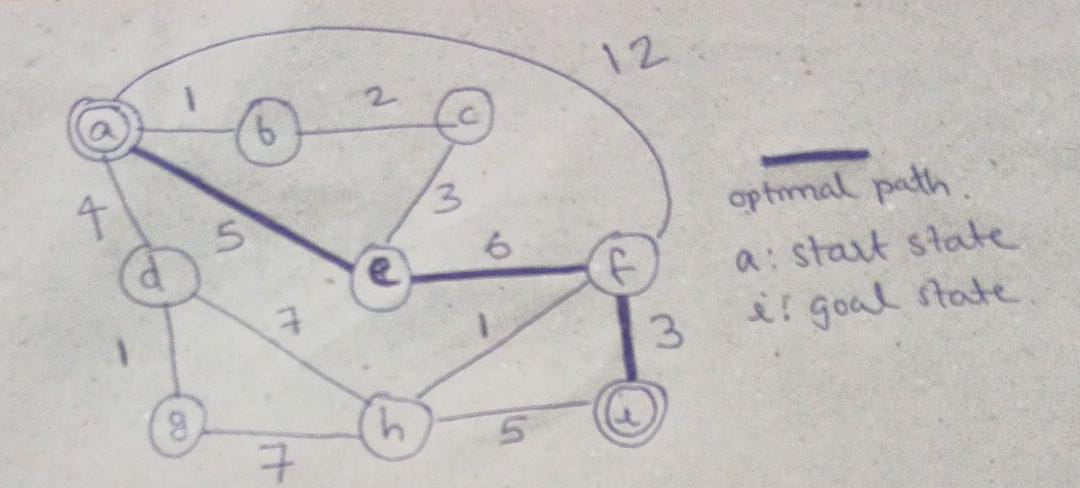

In [40]:
g = Graph()
g.add_edge("a", "b", 1)
g.add_edge("b", "c", 2)
g.add_edge("c", "e", 3)
g.add_edge("a", "d", 4)
g.add_edge("a", "e", 5)
g.add_edge("d", "g", 1)
g.add_edge("g", "h", 7)
g.add_edge("d", "h", 7)
g.add_edge("h", "f", 1)
g.add_edge("f", "i", 3)
g.add_edge("e", "f", 6)
g.add_edge("h", "i", 5)
g.add_edge("a", "f", 12)

start_state = "a"
goal_state = "i"

print("Depth First Traversal:", g.dft(start_state))
print("Breadth First Traversal:" , g.bft(start_state))
print("Depth First Search: {} with path cost: {}".format(*g.dfs(start_state, goal_state)))
print("Breadth First Search: {} with path cost: {}".format(*g.bfs(start_state, goal_state)))
print("Uniform Cost Search: {} with path cost: {}".format(*g.ucs(start_state, goal_state)))

Depth First Traversal: ['a', 'f', 'i', 'h', 'g', 'd', 'e', 'c', 'b']
Breadth First Traversal: ['a', 'e', 'b', 'd', 'f', 'c', 'h', 'g', 'i']
Depth First Search: ['a', 'f', 'i'] with path cost: 15
Breadth First Search: ['a', 'f', 'i'] with path cost: 15
Uniform Cost Search: ['a', 'e', 'f', 'i'] with path cost: 14
